In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
admission_data=pd.read_csv('D:\kim\Data Visualization with Python\Datasets\\admission\\Admission_Predict_Ver1.1.csv')
admission_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admission_data.shape

(500, 9)

In [4]:
admission_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
admission_data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<AxesSubplot:xlabel='GRE Score', ylabel='TOEFL Score'>

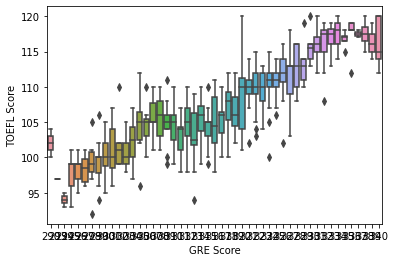

In [6]:
#identifying outliers

#admission_data.boxplot(column=['Chance of Admit'])
sns.boxplot(data=admission_data,x="GRE Score",y="TOEFL Score")

<AxesSubplot:>

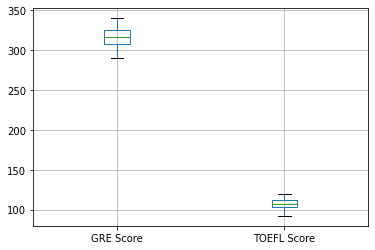

In [7]:
admission_data.boxplot(column=["GRE Score","TOEFL Score"])

<AxesSubplot:>

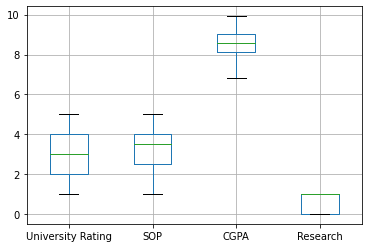

In [8]:
admission_data.boxplot(column=["University Rating","SOP","CGPA","Research"])

In [9]:
#drop serial nummber
admission_data1= admission_data.copy()
admission_data1.drop(['Serial No.'],axis=1, inplace=True)
admission_data1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
#calculating the interQuartile range
q1= admission_data1.quantile(0.25)
q3= admission_data1.quantile(0.75)
iqr=q3-q1
print(iqr)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [11]:
#identifying the outliers
admission_out1=admission_data1[((admission_data1<(q1-1.5*iqr))| (admission_data1>(q3+1.5*iqr))).any(axis=1)]
admission_out1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


In [12]:
#removing outliers
admission_out=admission_data1[~((admission_data<(q1-1.5*iqr))| (admission_data1>(q3+1.5*iqr))).any(axis=1)]
admission_data=admission_out.copy()
admission_data.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_992\3000188090.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  admission_out=admission_data1[~((admission_data<(q1-1.5*iqr))| (admission_data1>(q3+1.5*iqr))).any(axis=1)]


(497, 8)

Text(0.5, 0, 'chances')

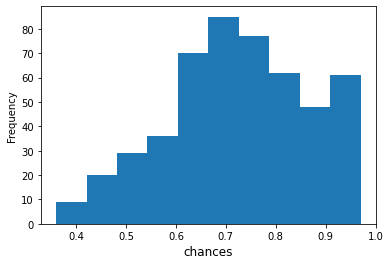

In [13]:
admission_data['Chance of Admit '].plot.hist()
plt.xlabel("chances",fontsize=12)

Text(0.5, 0, 'Rating')

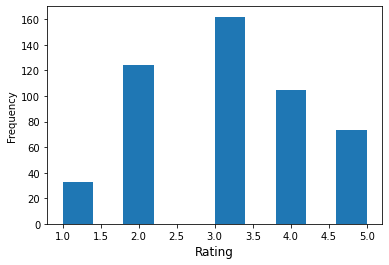

In [14]:
admission_data['University Rating'].plot.hist()
plt.xlabel("Rating", fontsize=12)

In [15]:
admission_data['Research'].value_counts()

1    280
0    217
Name: Research, dtype: int64

In [16]:
#separating the data

X=admission_data.drop(["Chance of Admit "],axis=1)
Y=admission_data['Chance of Admit ']
X.shape,Y.shape

((497, 7), (497,))

In [17]:
admission_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
admission_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [19]:
admission_data.dtypes


GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test=train_test_split(X,Y, random_state=56)

In [21]:
#importing linear regression
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [22]:
#creating instance of LR
lr=LR(normalize=True)

In [23]:
#fitting the model
lr.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [24]:
#predicting the model

train_predict=lr.predict(X_train)
k=mae(train_predict,Y_train)
print("The mean absolute error is: ",k)

The mean absolute error is:  0.039940705622531554


In [25]:
test_predict=lr.predict(X_test)
k=mae(test_predict,Y_test)
print("The mean absolute error is: ",k)

The mean absolute error is:  0.04626540969766836


In [26]:
#model evaluation
import joblib
from sklearn.metrics import mean_squared_error
pred_train= lr.predict(X_train)
train_score=np.sqrt(mean_squared_error(Y_train, pred_train))
joblib.dump(lr,"pred_train.joblib")
print(train_score)

0.05671293520627018


In [27]:
pred_test = lr.predict(X_test)
test_score = np.sqrt(mean_squared_error(Y_test, pred_test))
print(test_score)

0.06403558473750126


In [28]:
train = lr.score(X_train,Y_train)*100
test = lr.score(X_test, Y_test)*100
print("the train accuracy is : ",train)
print("the test accuracy is : ",test)

the train accuracy is :  82.93528397844712
the test accuracy is :  79.45576280952007


In [ ]:
#creating a gui

import tkinter as tk
from tkinter import messagebox
import joblib
from tkinter import filedialog
import pandas as pd

def open_file():
    filepath = filedialog.askopenfilename(filetypes=[("CSV files", ".csv")])
    if filepath:
        try:
            data = pd.read_csv(filepath)
            process_data(data)
        except Exception as e:
            messagebox.showerror("Error", f"Failed to open file: {e}")

def process_data(data):
    model = joblib.load("pred_train.joblib")
    y_pred = model.predict(data)
    data['predicted_target'] = y_pred
    save_file(data)

def save_file(data):
    savepath = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", ".csv")])
    if savepath:
        try:
            data.to_csv(savepath, index=False)
            messagebox.showinfo("Success", "File saved successfully")
        except Exception as e:
            messagebox.showerror("Error", f"File couldn't be saved: {e}")

 ##############################################################################

root = tk.Tk()
root.title("Admission Prediction")
root.geometry("300x200")

button1 = tk.Button(root, text="Upload a CSV file", height=3, width=20,
                    activebackground="lightgreen", background="lightblue",
                    font=("Arial", 11, "bold"),
                    command=open_file)
button1.pack(pady=50)

root.mainloop()
